In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
df = pd.read_csv('C:/Users/Administrator/Desktop/global_cars_enhanced.csv')

df.head()

,Car_ID,Brand,Manufacture_Year,Body_Type,Fuel_Type,Transmission,Engine_CC,Horsepower,Mileage_km_per_l,Price_USD,Manufacturing_Country,Car_Age,Price_Category,HP_per_CC,Age_Category,Efficiency_Score
0,CAR_0001,Mercedes,2006,SUV,Petrol,Manual,4089,547,17,73407,USA,20,Premium,0.1338,Old,0.35
1,CAR_0002,Nissan,2023,Coupe,Petrol,Automatic,4618,167,25,79370,USA,3,Premium,0.0362,New,0.75
2,CAR_0003,Nissan,2007,Hatchback,Diesel,Manual,1802,110,16,76549,China,19,Premium,0.0610,Old,0.30
3,CAR_0004,Nissan,2013,Coupe,Petrol,Manual,1835,373,16,48722,USA,13,Mid-Range,0.2033,Old,0.30
4,CAR_0005,Hyundai,2009,Hatchback,Hybrid,Automatic,2332,145,28,83265,UK,17,Premium,0.0622,Old,0.90


In [4]:
target = "Price_USD"

In [5]:
X = df.drop(columns=["Price_USD", "Car_ID"])
y = df["Price_USD"]

In [6]:
numeric_features = X.select_dtypes(include=["int64", "float64"]).columns
categorical_features = X.select_dtypes(include=["object"]).columns

In [7]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ]
)


In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [9]:
lr_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", LinearRegression())
])

lr_pipeline.fit(X_train, y_train)

y_pred_lr = lr_pipeline.predict(X_test)

In [11]:
print("Linear Regression Results:")
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("R2:", r2_score(y_test, y_pred_lr))


Linear Regression Results:
MAE: 7758.238074166859
RMSE: 8965.771523495443
R2: 0.9340864145624308


In [10]:
rf_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor(random_state=42))
])

rf_pipeline.fit(X_train, y_train)

y_pred_rf = rf_pipeline.predict(X_test)


In [11]:
print("Random Forest Results:")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R2:", r2_score(y_test, y_pred_rf))


Random Forest Results:
MAE: 8085.296666666666
RMSE: 9473.30073275044
R2: 0.9264128048071336


In [12]:
model = rf_pipeline.named_steps["model"]

feature_names = (
    numeric_features.tolist() +
    list(rf_pipeline.named_steps["preprocessor"]
         .named_transformers_["cat"]
         .get_feature_names_out(categorical_features))
)

importances = model.feature_importances_

feature_importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

feature_importance_df.head(10)


,Feature,Importance
35,Price_Category_Luxury,0.436795
34,Price_Category_Budget,0.331446
36,Price_Category_Mid-Range,0.096096
37,Price_Category_Premium,0.081560
2,Horsepower,0.007409
1,Engine_CC,0.005807
5,HP_per_CC,0.005554
0,Manufacture_Year,0.004754
4,Car_Age,0.004326
3,Mileage_km_per_l,0.003090


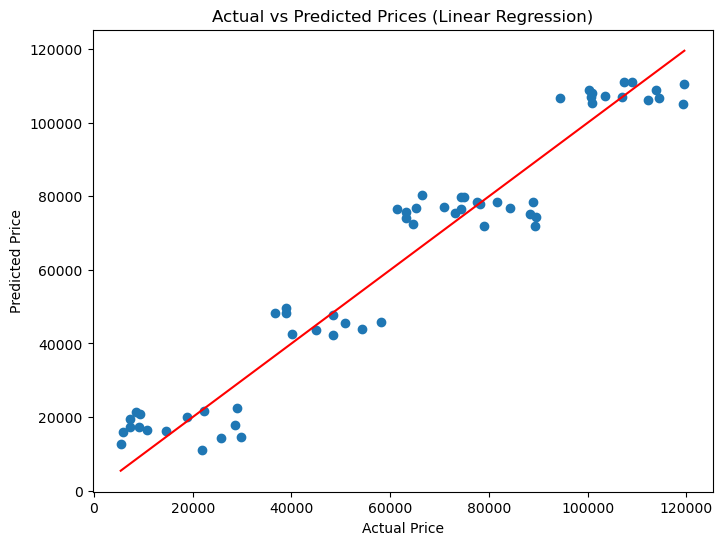

In [12]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_lr)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices (Linear Regression)")

# Perfect prediction line
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red')

plt.show()

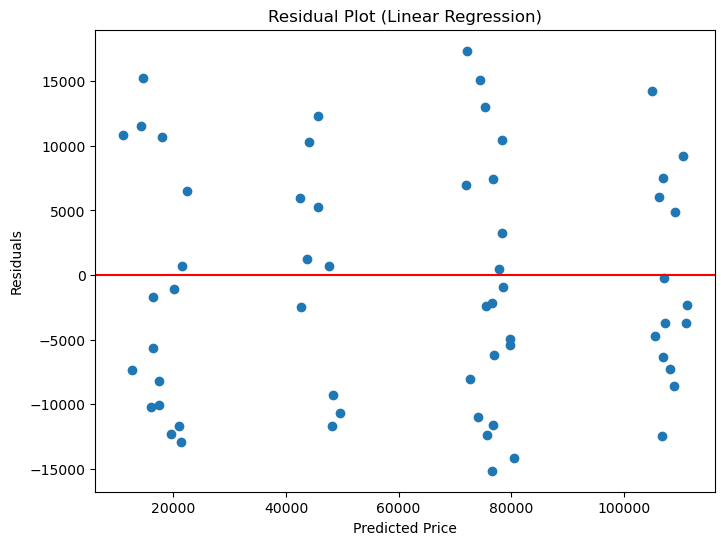

In [13]:
residuals = y_test - y_pred_lr

plt.figure(figsize=(8,6))
plt.scatter(y_pred_lr, residuals)
plt.axhline(y=0, color='red')
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.title("Residual Plot (Linear Regression)")
plt.show()

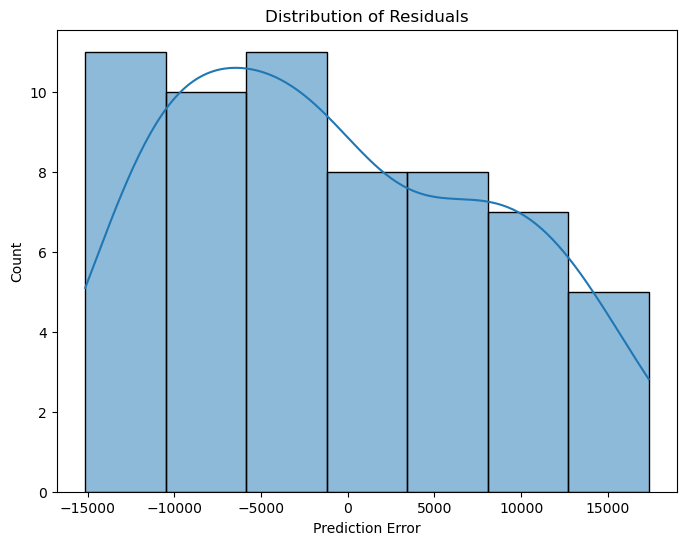

In [14]:
plt.figure(figsize=(8,6))
sns.histplot(residuals, kde=True)
plt.title("Distribution of Residuals")
plt.xlabel("Prediction Error")
plt.show()

In [13]:
y_pred_lr = lr_pipeline.predict(X_test)

In [14]:
predictions_df = X_test.copy()

predictions_df["Actual_Price"] = y_test
predictions_df["Predicted_Price"] = y_pred_lr
predictions_df["Residual"] = y_test - y_pred_lr

In [15]:
predictions_df["Car_ID"] = df.loc[X_test.index, "Car_ID"]

In [16]:
predictions_df.head()

,Brand,Manufacture_Year,Body_Type,Fuel_Type,Transmission,Engine_CC,Horsepower,Mileage_km_per_l,Manufacturing_Country,Car_Age,Price_Category,HP_per_CC,Age_Category,Efficiency_Score,Actual_Price,Predicted_Price,Residual,Car_ID
203,Audi,2025,Coupe,Electric,Automatic,3297,212,24,Japan,1,Budget,0.0643,New,0.70,14652,16315.176008,-1663.176008,CAR_0204
266,Ford,2020,Sedan,Hybrid,Manual,2423,205,24,Japan,6,Mid-Range,0.0846,Recent,0.70,38970,48256.297404,-9286.297404,CAR_0267
152,Toyota,2009,Coupe,Diesel,Automatic,4061,164,10,USA,17,Luxury,0.0404,Old,0.00,100637,106945.710565,-6308.710565,CAR_0153
9,Honda,2020,Sedan,Electric,Manual,4254,116,17,South Korea,6,Budget,0.0273,Recent,0.35,8511,21431.929893,-12920.929893,CAR_0010
233,Nissan,2019,Sedan,Electric,Automatic,2004,245,16,USA,7,Luxury,0.1223,Recent,0.30,108928,111218.986627,-2290.986627,CAR_0234


In [18]:
predictions_df.to_csv('C:/Users/Administrator/Desktop/car_price_predictions.csv', index=False)